<h1><center>Miami Housing Prediction & Analysis</center></h1>




<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📚Importing necessary libraries 📚</h1>

In [3]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
# import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
from sima.sklearn_modified.sklearn.metrics import mean_absolute_error
from sima.sklearn_modified.sklearn.metrics import mean_squared_error
from sima.sklearn_modified.sklearn.metrics import r2_score
from sima.sklearn_modified.sklearn.preprocessing import MinMaxScaler

from sima.sklearn_modified.sklearn.model_selection import train_test_split
from sima.sklearn_modified.sklearn.linear_model import QuantileRegressor

# import geopandas as gdf
import os
warnings.filterwarnings('ignore')


<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset</h1>

In [4]:
df =pd.read_csv("dataset/miami-housing.csv")


<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</h1>

In [18]:
df = df.sample(n=1000, random_state=1)

In [19]:
df.shape,df.size

((1000, 17), 17000)

In [6]:
print( df.duplicated().sum())

0


In [7]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Columns: 17 entries, LATITUDE to structure_quality
dtypes: float64(9), int64(8)
memory usage: 1.8 MB


<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#003f88;border-color:black;width:60%;margin: auto;text-align: left;">
<b>Insight:</b> 🔨🔨🔨13932 rows and 17 columns, 236844 values, No null value, No duplicate ,Memory Usage: 1.8 MB


In [8]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Visualization</h1>

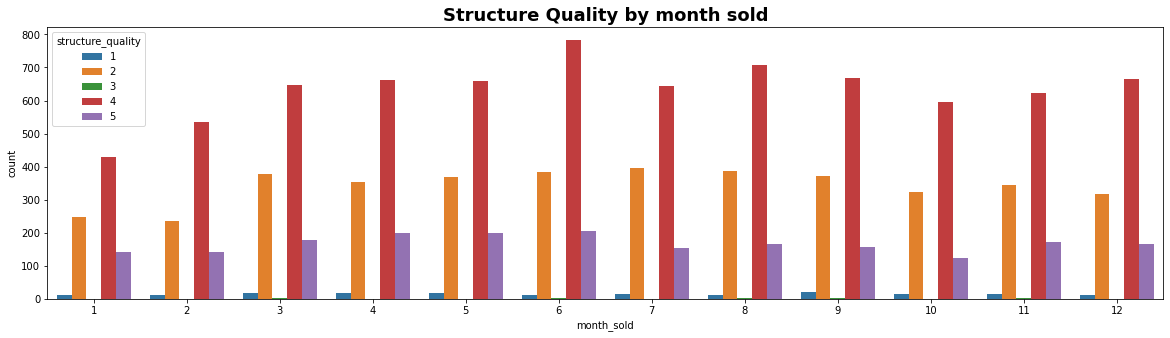

In [9]:
plt.figure(figsize=(20,5))
#sns.set_theme(style="darkgrid")

ax = sns.countplot(x="month_sold",hue = 'structure_quality', data=df)

plt.title("Structure Quality by month sold", fontsize=18,weight='bold')
plt.show()

In [10]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = df['month_sold'],
                     values = df['SALE_PRC'],title = 'Sale by month',
                     name = "Sale by Month",
                     hole = 0.75                     
                    )
             )


fig.update_traces(marker=dict(
     line=dict(
        color='black',
        width=1
    )))

fig.show()

<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Selection</h1>

In [11]:
col_unique_value = list()
for col in df.columns.tolist():
    if df[col].nunique() == 1:
        col_unique_value .append(col)

print(col_unique_value )

[]


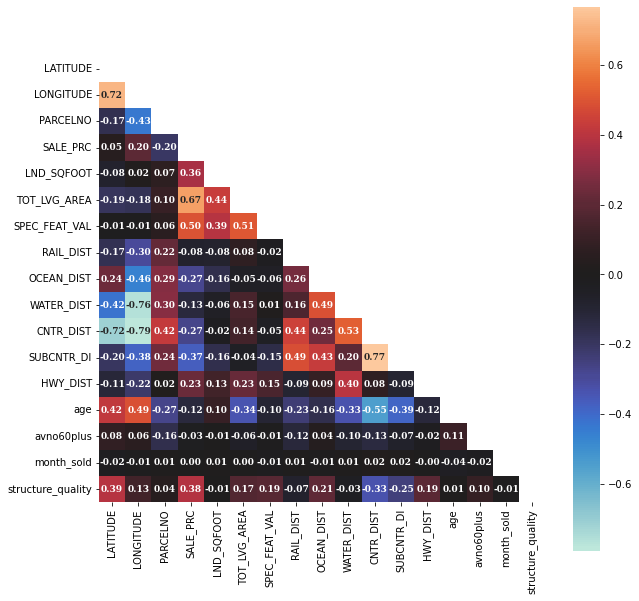

In [12]:
plt.figure(figsize=(10, 10))
# Calculate pairwise-correlation
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True,annot_kws={
                'fontsize': 9,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })

plt.show();

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#003f88;border-color:black;width:60%;margin: auto;text-align: left;">
<center><b>Insight:</b> 🔨No column to drop  with unique value, No High   correlation 🔨<center>

<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model</h1>

In [20]:
X = df.loc[:, df.columns != 'SALE_PRC']
X=(X-X.min())/(X.max()-X.min())
Y = df["SALE_PRC"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
#print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))

y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)

y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)


In [22]:
quantiles=[0.025,0.5,0.975]
model = QuantileRegressor(quantile=quantiles,alpha=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
y_pred_df = pd.DataFrame(y_pred, columns=['0.025','0.5','0.975'])

In [27]:
y_pred_df

,0.025,0.5,0.975
0,440551.000398,744958.734299,1.703566e+06
1,237597.692812,363619.662663,7.669904e+05
2,134160.748877,162814.693040,3.575538e+05
3,216939.494895,293596.934026,7.912756e+05
4,222586.507632,265175.226979,3.843545e+05
...,...,...,...
295,350798.143295,524118.070641,1.391170e+06
296,314311.517799,395420.968062,6.841369e+05
297,85710.519339,195083.601941,6.556664e+05
298,319030.910114,459358.153748,8.532652e+05


In [28]:
X_test

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
4223,0.538752,0.612908,0.059521,0.339326,0.639099,0.023529,0.136624,0.147587,0.051807,0.187897,0.086210,0.330029,0.736264,0.0,0.454545,0.75
6369,0.568220,0.443652,0.824312,0.108366,0.233935,0.030682,0.438912,0.464678,0.173693,0.316404,0.203968,0.276657,0.593407,0.0,1.000000,0.75
10993,0.922696,0.487135,0.818627,0.115554,0.043875,0.009086,0.727997,0.925478,0.016334,0.445671,0.651834,0.124405,0.230769,0.0,0.727273,0.75
8558,0.196407,0.383513,0.829987,0.062174,0.286158,0.030447,0.321917,0.203889,0.139913,0.648904,0.515809,0.108320,0.043956,0.0,0.545455,0.25
12910,0.454323,0.250430,0.829659,0.012730,0.114541,0.000000,0.534318,0.633495,0.818238,0.529003,0.350376,0.377148,0.175824,0.0,0.454545,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.873730,0.854827,0.139146,0.119452,0.373131,0.084052,0.190308,0.250693,0.102761,0.276191,0.409594,0.263460,0.285714,0.0,1.000000,0.75
13848,0.344807,0.280414,0.829727,0.062174,0.392351,0.209960,0.077994,0.485720,0.466657,0.576667,0.379728,0.317919,0.142857,0.0,0.181818,0.25
654,0.790556,0.726392,0.821724,0.100976,0.005824,0.012234,0.230513,0.496840,0.098014,0.186452,0.302244,0.222915,0.450549,0.0,0.363636,0.75
7040,0.847685,0.578334,0.081923,0.163797,0.278587,0.284756,0.383338,0.754749,0.144006,0.319133,0.486272,0.255213,0.384615,0.0,0.363636,0.75


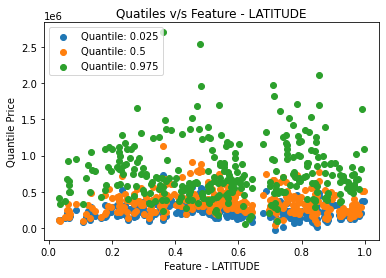

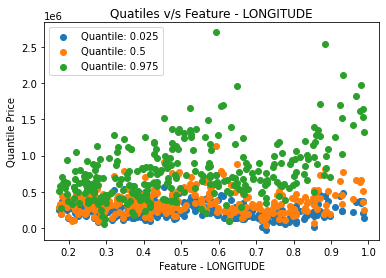

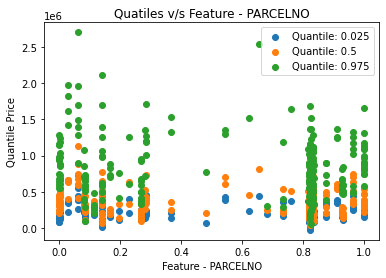

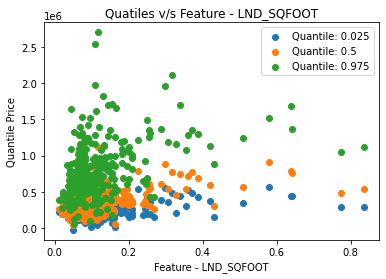

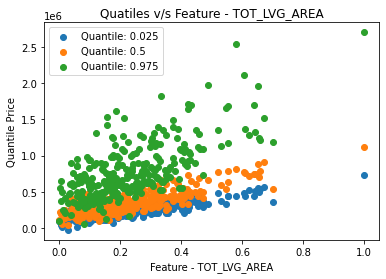

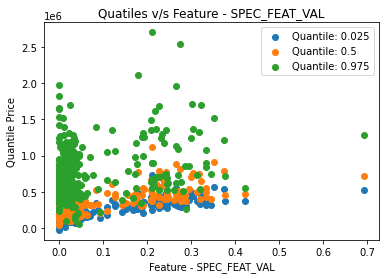

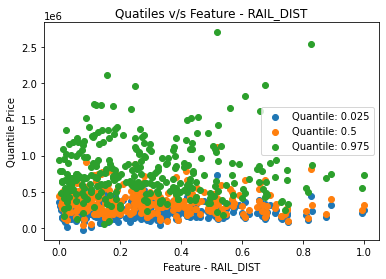

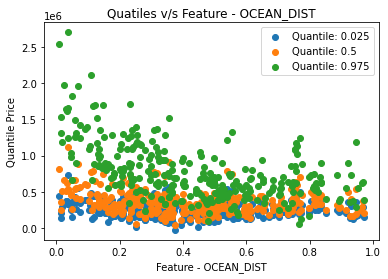

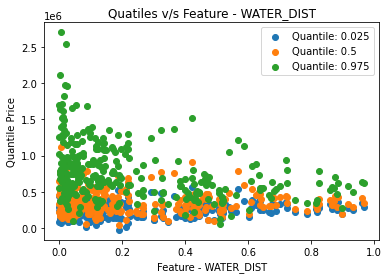

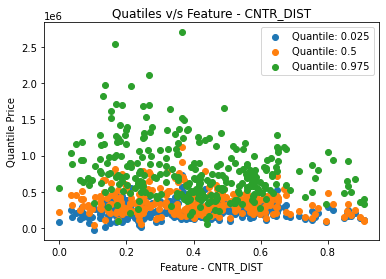

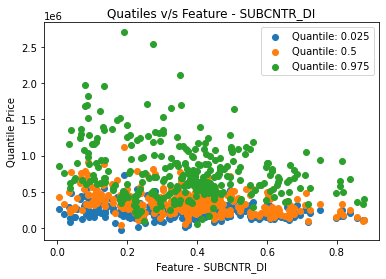

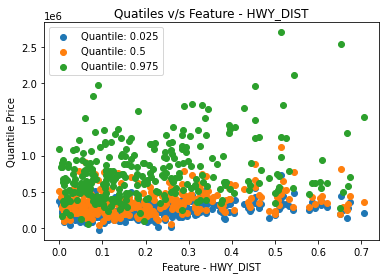

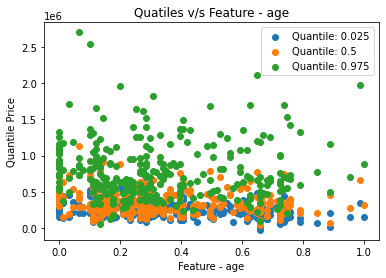

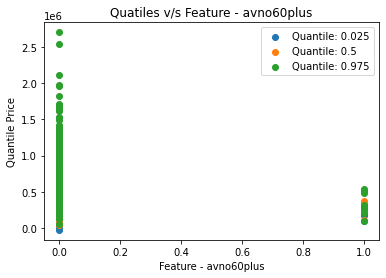

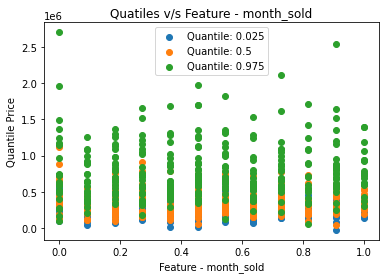

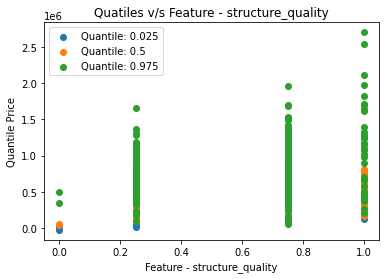

In [53]:
for feature in X_test.columns:
    for col in y_pred_df.columns:
        plt.scatter(X_test[feature], y_pred_df[col], label=f"Quantile: {col}")
    plt.legend()
    plt.title(f"Quatiles v/s Feature - {feature}")
    plt.ylabel("Quantile Price")
    plt.xlabel(f"Feature - {feature}")
    plt.show()